In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [13]:
df = pd.read_excel("/Users/Priyanshu/Downloads/retail_sales_dataset.xlsx")

In [14]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [15]:
df = df[['Customer ID','Age','Gender','Transaction ID','Date','Product Category','Quantity','Price per Unit','Total Amount']]

In [16]:
df.head()

,Customer ID,Age,Gender,Transaction ID,Date,Product Category,Quantity,Price per Unit,Total Amount
0,CUST001,34,Male,1,2023-11-24,Beauty,3,50,150
1,CUST002,26,Female,2,2023-02-27,Clothing,2,500,1000
2,CUST003,50,Male,3,2023-01-13,Electronics,1,30,30
3,CUST004,37,Male,4,2023-05-21,Clothing,1,500,500
4,CUST005,30,Male,5,2023-05-06,Beauty,2,50,100


In [17]:
df.isnull().sum()

Customer ID         0
Age                 0
Gender              0
Transaction ID      0
Date                0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [18]:
TotalAmount = df['Quantity']* df['Price per Unit']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [20]:
new_df = df[['Customer ID','Age','Gender','Transaction ID','Date','Product Category','Quantity','Total Amount']]

new_df2 = df.copy()

In [21]:
new_df.head()

,Customer ID,Age,Gender,Transaction ID,Date,Product Category,Quantity,Total Amount
0,CUST001,34,Male,1,2023-11-24,Beauty,3,150
1,CUST002,26,Female,2,2023-02-27,Clothing,2,1000
2,CUST003,50,Male,3,2023-01-13,Electronics,1,30
3,CUST004,37,Male,4,2023-05-21,Clothing,1,500
4,CUST005,30,Male,5,2023-05-06,Beauty,2,100


In [22]:
ProductCategory_price = new_df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
ProductCategory_price

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

<Axes: xlabel='Product Category'>

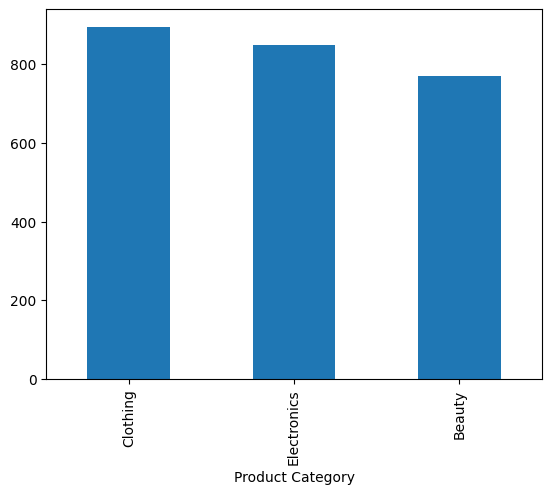

In [25]:
ProductCategory_price[:3].plot(kind = 'bar')

In [29]:
new_df2.head()

,Customer ID,Age,Gender,Transaction ID,Date,TotalAmount,Product Category,Quantity,Price per Unit,Total Amount
0,CUST001,34,Male,1,2023-11-24,150,Beauty,3,50,150
1,CUST002,26,Female,2,2023-02-27,1000,Clothing,2,500,1000
2,CUST003,50,Male,3,2023-01-13,30,Electronics,1,30,30
3,CUST004,37,Male,4,2023-05-21,500,Clothing,1,500,500
4,CUST005,30,Male,5,2023-05-06,100,Beauty,2,50,100


In [34]:
timest = new_df['Date'].dt.year

new_df['Year']= timest

new_df.head()

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_30468\4178355932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year']= timest


,Customer ID,Age,Gender,Transaction ID,Date,Product Category,Quantity,Total Amount,Year
0,CUST001,34,Male,1,2023-11-24,Beauty,3,150,2023
1,CUST002,26,Female,2,2023-02-27,Clothing,2,1000,2023
2,CUST003,50,Male,3,2023-01-13,Electronics,1,30,2023
3,CUST004,37,Male,4,2023-05-21,Clothing,1,500,2023
4,CUST005,30,Male,5,2023-05-06,Beauty,2,100,2023


<Axes: xlabel='Year'>

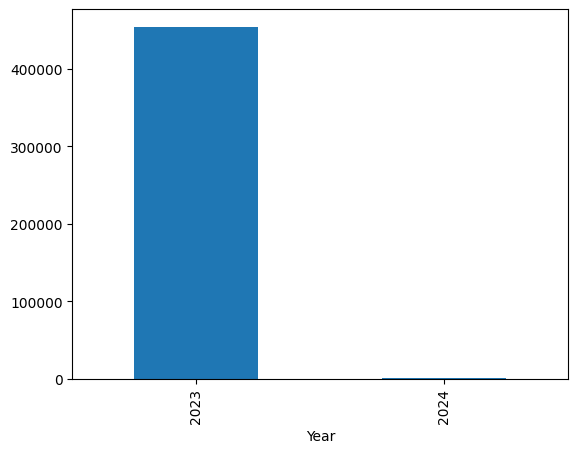

In [36]:
new_df.groupby('Year')['Total Amount'].sum().plot(kind='bar')

<Axes: title={'center': 'Sales month view'}, xlabel='Mon,Year'>

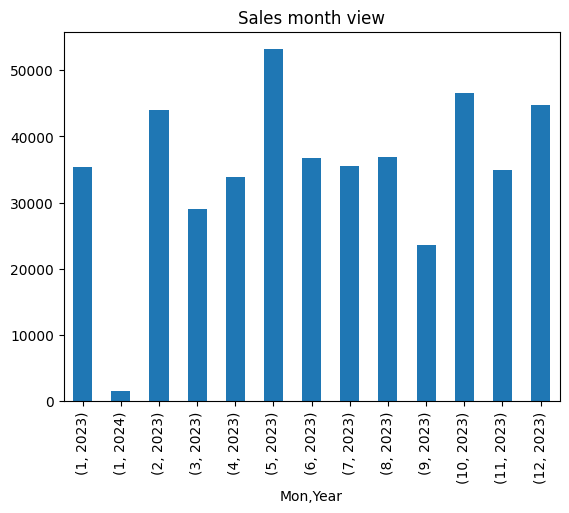

In [43]:
new_df['Mon']=new_df['Date'].dt.month
new_df['Month']= new_df['Date'].dt.month_name()
new_df.groupby(['Mon','Year'])['Total Amount'].sum().plot(kind='bar',title='Sales month view')

In [44]:
get_2024 = new_df[(new_df['Year']==2024)]
get_jan2024 = get_2024[(new_df['Month']=='January')]
get_2024 = get_jan2024['Date'].dt.date.unique()
get_2024

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_30468\2253782654.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_jan2024 = get_2024[(new_df['Month']=='January')]


array([datetime.date(2024, 1, 1)], dtype=object)

In [45]:
new_df.head()

,Customer ID,Age,Gender,Transaction ID,Date,Product Category,Quantity,Total Amount,Year,Mon,Month
0,CUST001,34,Male,1,2023-11-24,Beauty,3,150,2023,11,November
1,CUST002,26,Female,2,2023-02-27,Clothing,2,1000,2023,2,February
2,CUST003,50,Male,3,2023-01-13,Electronics,1,30,2023,1,January
3,CUST004,37,Male,4,2023-05-21,Clothing,1,500,2023,5,May
4,CUST005,30,Male,5,2023-05-06,Beauty,2,100,2023,5,May


In [46]:
new_df=new_df.dropna()
new_df.isnull().sum()

Customer ID         0
Age                 0
Gender              0
Transaction ID      0
Date                0
Product Category    0
Quantity            0
Total Amount        0
Year                0
Mon                 0
Month               0
dtype: int64

<Axes: title={'center': 'Most Customers for Product category'}, xlabel='Product Category'>

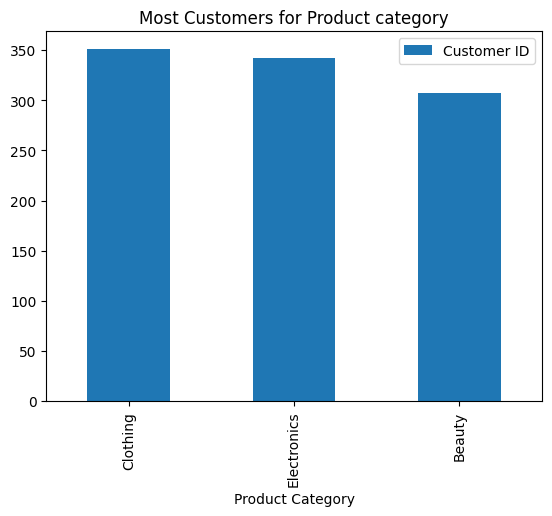

In [48]:
cus_id = pd.DataFrame(new_df.groupby('Product Category')['Customer ID'].count().sort_values(ascending=False))
cus_id[:3].plot(kind='bar', title='Most Customers for Product category')

In [49]:
new_df2 = new_df2.dropna()
new_df2.isnull().sum()
new_df2.head()

,Customer ID,Age,Gender,Transaction ID,Date,TotalAmount,Product Category,Quantity,Price per Unit,Total Amount
0,CUST001,34,Male,1,2023-11-24,150,Beauty,3,50,150
1,CUST002,26,Female,2,2023-02-27,1000,Clothing,2,500,1000
2,CUST003,50,Male,3,2023-01-13,30,Electronics,1,30,30
3,CUST004,37,Male,4,2023-05-21,500,Clothing,1,500,500
4,CUST005,30,Male,5,2023-05-06,100,Beauty,2,50,100


In [50]:
new_df.head()

,Customer ID,Age,Gender,Transaction ID,Date,Product Category,Quantity,Total Amount,Year,Mon,Month
0,CUST001,34,Male,1,2023-11-24,Beauty,3,150,2023,11,November
1,CUST002,26,Female,2,2023-02-27,Clothing,2,1000,2023,2,February
2,CUST003,50,Male,3,2023-01-13,Electronics,1,30,2023,1,January
3,CUST004,37,Male,4,2023-05-21,Clothing,1,500,2023,5,May
4,CUST005,30,Male,5,2023-05-06,Beauty,2,100,2023,5,May


In [59]:
avg_sales = new_df2.groupby(['Gender','Product Category'])[['Quantity','Total Amount']].mean().sort_values(by='Quantity', ascending=False)

avg_sales

Quantity  Total Amount
Gender Product Category                        
Female Electronics       2.582353    451.382353
Male   Clothing          2.559322    419.802260
Female Clothing          2.534483    467.097701
       Beauty            2.518072    450.783133
Male   Beauty            2.503546    487.127660
       Electronics       2.383721    466.104651

In [60]:
avg_sales=new_df2.groupby(['Transaction ID','Product Category'])[['Quantity','Total Amount']].mean().sort_values(by = 'Quantity', ascending=False)
avg_sales

,,Quantity,Total Amount
Transaction ID,Product Category,,
1000,Electronics,4.0,120.0
756,Electronics,4.0,1200.0
262,Beauty,4.0,120.0
614,Beauty,4.0,1200.0
615,Clothing,4.0,100.0
...,...,...,...
309,Beauty,1.0,25.0
784,Electronics,1.0,500.0
783,Clothing,1.0,300.0
